Automatically created module for IPython interactive environment


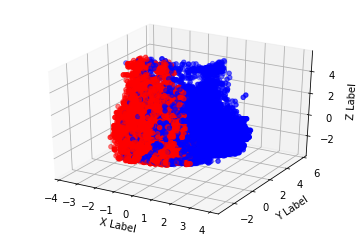

0.6635788611600639
[0.25597732 0.49746109 0.66357886 0.79834732 0.91480404 1.
 1.         1.        ]


In [1]:
%matplotlib inline
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn import datasets



lb = LabelEncoder() 
df = pd.read_csv('data2.txt', sep='\t')

df = df.drop(columns = ["'TASKCENTER_DESCRIPTION'","'CODE_DESCRIPTION'"])
df["'TASK_CENTER'"] = lb.fit_transform(df["'TASK_CENTER'"]) 
df["'PARTNO'"] = lb.fit_transform(df["'PARTNO'"]) 
df["'SOIRNO'"] = lb.fit_transform(df["'SOIRNO'"]) 
df["'PLANT'"] = lb.fit_transform(df["'PLANT'"]) 
df["'MIKTAR'"] = lb.fit_transform(df["'MIKTAR'"]) 
df["'DURATION_SECONDS'"] = lb.fit_transform(df["'DURATION_SECONDS'"]) 
df["'CODE'"] = lb.fit_transform(df["'CODE'"]) 
df["'RN'"] = lb.fit_transform(df["'RN'"]) 


#print(df["'PARTNO'"])
X = df


#X = df[[(x == 1760) for x in df["'PARTNO'"]]]

#Y = X[[(x == 51) for x in X["'CODE'"]]]

#X = Y
    
        

#print(len(X["'PARTNO'"].unique()))
#print(X.describe())

colors = X["'DURATION_SECONDS'"].tolist()
colors = ["red" if x<60*60 else "blue" for x in colors]
#colors = ["yellow" if 3600<x<7200 else "blue" for x in colors]


from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) #burada normalizasyon yapıyoruz

from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=3)
X_pca = sklearn_pca.fit_transform(X_std)






newDF = pd.DataFrame(X_pca, columns=['pc1', 'pc2','pc3'])
#newDF['class']=y
newDF.head()

#print(colors)
#plt.scatter(newDF['pc1'], newDF['pc2'], newDF['pc3'])
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newDF['pc1'], newDF['pc2'], newDF['pc3'],c=colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

print (sum(sklearn_pca.explained_variance_ratio_))

pca = PCA().fit(X_std)
#print (pca.explained_variance_ratio_)

cumVar = np.cumsum(pca.explained_variance_ratio_)

print (cumVar)